# Tarea Marzo 26

####  utilizando la distancia euclídea ¿cuál es el error entre un dataset y el otro?

Importar las librerias Necesarias

In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime
from datetime import timezone
import matplotlib.pyplot as plt
import math as mt

## Leer y Mostrar los archivos de datos 

In [2]:
humedadPatron = pd.read_csv('Humedad_Patron.csv', names = ["Day", "Hour", "Humidity"])
humedadStation = pd.read_csv('Humedad_Station.csv', names = ["Unixtime", "Humidity"])

In [3]:
humedadPatron[:5]

,Day,Hour,Humidity
0,05/12/17,2:15 p,75
1,05/12/17,2:20 p,75
2,05/12/17,2:25 p,74
3,05/12/17,2:30 p,73
4,05/12/17,2:35 p,73


In [4]:
humedadStation[:5]

,Unixtime,Humidity
0,1511906403,58.34
1,1511906405,57.54
2,1511906407,58.18
3,1511906409,58.18
4,1511906412,58.18


Convertir y mostrar los datos en arreglos

In [5]:
humedadP = humedadPatron.values
humedadS = humedadStation.values

In [6]:
humedadP[:5]

array([['05/12/17', '2:15 p', 75],
       ['05/12/17', '2:20 p', 75],
       ['05/12/17', '2:25 p', 74],
       ['05/12/17', '2:30 p', 73],
       ['05/12/17', '2:35 p', 73]], dtype=object)

In [18]:
humedadS[:5]

array([[  1.51190640e+09,   5.83400000e+01],
       [  1.51190640e+09,   5.75400000e+01],
       [  1.51190641e+09,   5.81800000e+01],
       [  1.51190641e+09,   5.81800000e+01],
       [  1.51190641e+09,   5.81800000e+01]])

## Convertir a Unixtime Humedad Patrón

Convertir a unixtime el tiempo en el arreglo humedad patron, para esto, se seguirán los siguientes pasos:
- Convertir hora a formato HH:MM (Var hour24)
- Convertir string hora a formato fecha + hora "datetime" (var hourDT)
- Convertir a formato unix 
- Agregar al nuevo arreglo humedadPUnix


In [19]:
humedadPUnix = [] # inicializar arreglo para humedad patron en unixtime
for i in humedadP:
    if i[1].split(' ')[1] == 'a':
        hour24 = str(datetime.strftime(datetime.strptime(i[1].split(' ')[0] + ' AM', '%I:%M %p'),"%H:%M"))
    else:
        hour24 = str(datetime.strftime(datetime.strptime(i[1].split(' ')[0] + ' PM', '%I:%M %p'),"%H:%M"))
    hourDT = datetime(int('20'+i[0][6:8]), int(i[0][3:5]), int(i[0][:2]), int(hour24[0:2]), int(hour24[3:5]))
    hourUnix = hourDT.replace(tzinfo=timezone.utc).timestamp()
    humedadPUnix.append([hourUnix, i[2]])
humedadPUnix = np.array(humedadPUnix)

### Graficar los arreglos

Convertir los arreglos a modo 'Pandas'

In [20]:
humedadSpd = pd.DataFrame({'UnixTime':humedadS[:,0],'Humidity':humedadS[:,1]})
humedadPpd = pd.DataFrame({'UnixTime':humedadPUnix[:,0],'Humidity':humedadPUnix[:,1]})

Ordenar los datos

In [21]:
humedadSpd = humedadSpd.sort_values(by=['UnixTime'])
humedadPpd = humedadPpd.sort_values(by=['UnixTime'])

#### Graficar

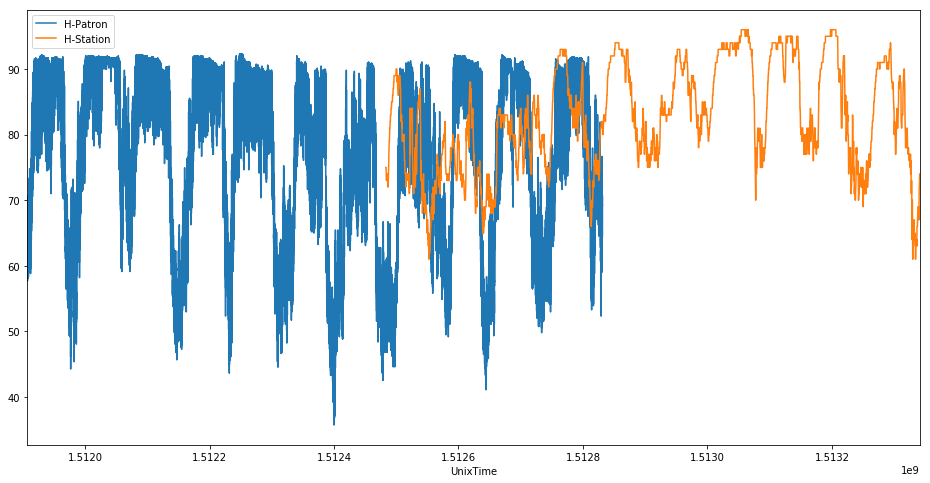

In [22]:
ax = humedadSpd.plot(x="UnixTime", y="Humidity",label="H-Patron")
humedadPpd.plot(figsize=(16, 8),ax=ax,x="UnixTime", y="Humidity",label="H-Station")

## Reducir Los Datasets

Se reducirá los datasets dejando los valores unixtime que se encuentren en los dos datasets.

In [23]:
print("Registros Humedad Patron: %s, Registros Humedad Station: %s" % ( len(humedadPUnix), len(humedadS)))

Registros Humedad Patron: 2850, Registros Humedad Station: 420425


Obtener el valor máximo y mínimo en los que se sobreponen los datasets

In [24]:
maxU = humedadSpd.UnixTime[len(humedadSpd)-1]
minU = humedadPpd.UnixTime[0]

Reducir los datasets al intervalo Unixtime [maxU, MinU]

In [61]:
humedadPrd = humedadPpd[lambda humedadPpd:(humedadPpd.UnixTime > minU) & (humedadPpd.UnixTime < maxU)]
humedadSrd = humedadSpd[lambda humedadSpd:(humedadSpd.UnixTime > minU) & (humedadSpd.UnixTime < maxU)]

#### Graficar

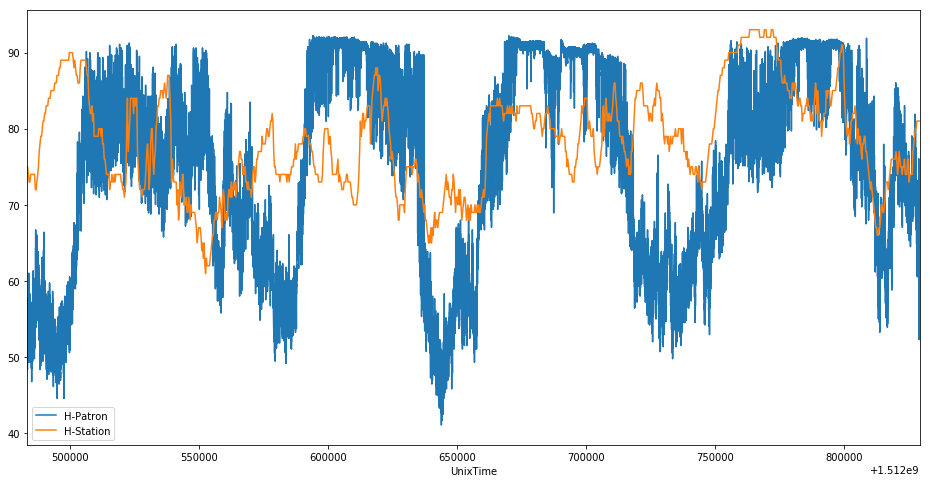

In [62]:
ax = humedadSrd.plot(x="UnixTime", y="Humidity",label="H-Patron")
humedadPrd.plot(figsize=(16, 8),ax=ax,x="UnixTime", y="Humidity",label="H-Station")

### Reducir Nuevamente Humedad Patron

Reducir el tamaño de Humedad Patrón al tamaño de Humedad Station de acuerdo a la relación en tamaño

In [63]:
print("Registros Humedad Patron: %s, Registros Humedad Station: %s" % ( len(humedadPrd), len(humedadSrd)))
print("Relación en tamaño Humedad Station vs Humedad Patron: %s" % (len(humedadSrd)/len(humedadPrd)))

Registros Humedad Patron: 1149, Registros Humedad Station: 156710
Relación en tamaño Humedad Station vs Humedad Patron: 136.3881636205396


Generar arreglo con los indices a eliminar de humedadSrd

In [64]:
rant = []
for i in range (0, len(humedadSrd)-1):
    if np.mod(i, 136) != 0:
        rant.append(i)

Reducir humedadSrd eliminando al redundancia de puntos, para esto se toman únicamente los registros cuyo indice modulo 136 = 0

In [65]:
humedadSrd.drop(humedadSrd.index[rant], inplace=True)

Eliminar los registros entre el tamaño de humedadPrd y el tamaño de humedadSrd

In [71]:
humedadSrd.drop(humedadSrd.index[range(len(humedadPrd), len(humedadSrd)-1)], inplace=True)

#### Graficar

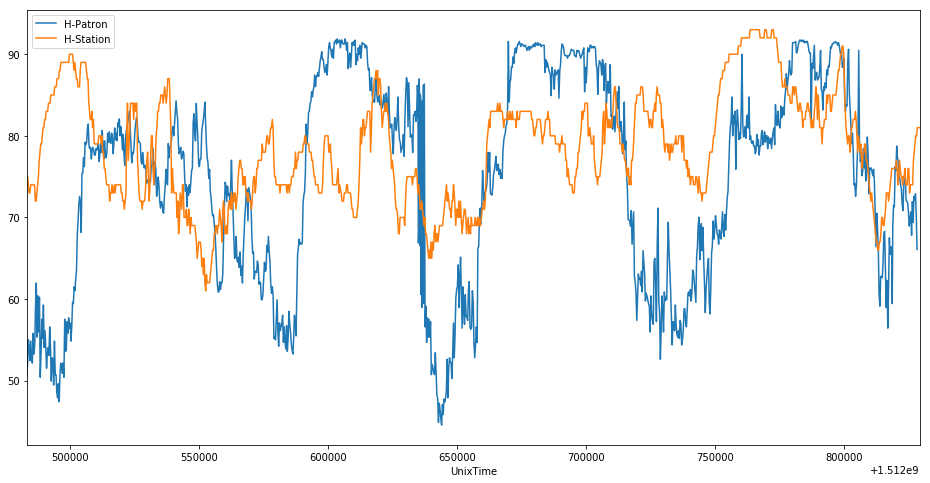

In [73]:
ax = humedadSrd.plot(x="UnixTime", y="Humidity",label="H-Patron")
humedadPrd.plot(figsize=(16, 8),ax=ax,x="UnixTime", y="Humidity",label="H-Station")

## Hallar la distancia entre los dos datasets

Verificar los tamaños de los arreglos de datos

In [74]:
print("Registros Humedad Patron: %s, Registros Humedad Station: %s" % ( len(humedadPrd), len(humedadSrd)))

Registros Humedad Patron: 1149, Registros Humedad Station: 1149


In [82]:
suma = 0
for i in range(len(humedadPrd)):
    distancia_punto_i = (humedadPrd.iloc[i]["Humidity"] - humedadSrd.iloc[i]["Humidity"])**2 + (humedadPrd.iloc[i]["UnixTime"] - humedadSrd.iloc[i]["UnixTime"])**2
    suma = suma + distancia_punto_i

print("Suma distancias")
print(suma)
print("Raiz suma distancias")
print(mt.sqrt(suma))
print("Promedio distancia")
print(mt.sqrt(suma)/len(humedadPrd))

Suma distancias
1288203873.73
Raiz suma distancias
35891.557137190335
Promedio distancia
31.23721247797244


In [81]:
a = pd.DataFrame({'A': humedadSrd["Humidity"].values,'B': humedadSrd["UnixTime"].values})
b = pd.DataFrame({'A': humedadPrd["Humidity"].values,'B': humedadPrd["UnixTime"].values})

print("Distancia Euclideana entre A y B")
print(np.linalg.norm(a-b))
print("Distancia Euclideana entre A y B Manual")
print(mt.sqrt(np.sum(np.sum((a-b)**2,axis=1))))
print("Distancia Euclideana Máxima entre A y B por puntos")
print(mt.sqrt(max(np.sum((a-b)**2,axis=1))))

Distancia Euclideana entre A y B
35891.5571372
Distancia Euclideana entre A y B Manual
35891.55713719036
Distancia Euclideana Máxima entre A y B por puntos
2016.0175416151517
